# Analysis, Spin-Spin Fitting, Decoherence

In [2]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Fit CNOT, Decoherence

In [9]:
model1 = loader("data/" + "spin-spin_cnot_gamma0_5.model")
channel1 = model1.channel

model2 = loader("data/" + "spin-spin_cnot_gamma1_0.model")
channel2 = model2.channel

model3 = loader("data/" + "spin-spin_cnot_gamma1_5.model")
channel3 = model3.channel

model4 = loader("data/" + "spin-spin_cnot_gamma2_0.model")
channel4 = model4.channel

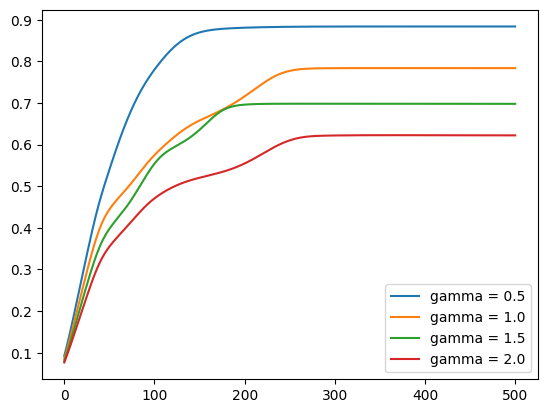

In [15]:
plt.plot(-np.array(model1.logger.loss_train_list), label="gamma = 0.5")
plt.plot(-np.array(model2.logger.loss_train_list), label="gamma = 1.0")
plt.plot(-np.array(model3.logger.loss_train_list), label="gamma = 1.5")
plt.plot(-np.array(model4.logger.loss_train_list), label="gamma = 2.0")
plt.legend()
plt.show()

In [18]:
U = tf.convert_to_tensor([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=tf.complex128)

channel_target = ChoiMapStatic(U, mode="unitary")

model_reference = loader("data/" + "spin-spin_cnot_degreeTwo.model")
channel_referece = model_reference.channel

In [21]:
channel_referece.liouvillian.gamma = 0.5
fidelity1 = channel_fidelity(channel1, channel_target)
fidelity_ref1 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 1.0
fidelity2 = channel_fidelity(channel2, channel_target)
fidelity_ref2 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 1.5
fidelity3 = channel_fidelity(channel3, channel_target)
fidelity_ref3 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 2.0
fidelity4 = channel_fidelity(channel4, channel_target)
fidelity_ref4 = channel_fidelity(channel_referece, channel_target)

In [23]:
print(fidelity1, fidelity_ref1)
print(fidelity2, fidelity_ref2)
print(fidelity3, fidelity_ref3)
print(fidelity4, fidelity_ref4)

tf.Tensor(0.8840750891431187, shape=(), dtype=float64) tf.Tensor(0.8840478647237169, shape=(), dtype=float64)
tf.Tensor(0.7839846081759927, shape=(), dtype=float64) tf.Tensor(0.7842871651085599, shape=(), dtype=float64)
tf.Tensor(0.6981608501790137, shape=(), dtype=float64) tf.Tensor(0.6982234747696155, shape=(), dtype=float64)
tf.Tensor(0.6223430475382955, shape=(), dtype=float64) tf.Tensor(0.6237763262251234, shape=(), dtype=float64)


## Teacher-Student Fitting, Decoherence

In [20]:
model1 = loader("data/" + "spin-spin_teacherStudent_gamma0_5.model")
channel1 = model1.channel

model2 = loader("data/" + "spin-spin_teacherStudent_gamma1_0.model")
channel2 = model2.channel

model3 = loader("data/" + "spin-spin_teacherStudent_gamma1_5.model")
channel3 = model3.channel

model4 = loader("data/" + "spin-spin_teacherStudent_gamma2_0.model")
channel4 = model4.channel

model_reference = loader("data/" + "spin-spin_teacherStudent.model")
channel_referece = model_reference.channel
channel_target = deepcopy(channel_referece)

In [21]:
channel_referece.liouvillian.gamma = 0.5
fidelity1 = channel_fidelity(channel1, channel_target)
fidelity_ref1 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 1.0
fidelity2 = channel_fidelity(channel2, channel_target)
fidelity_ref2 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 1.5
fidelity3 = channel_fidelity(channel3, channel_target)
fidelity_ref3 = channel_fidelity(channel_referece, channel_target)

channel_referece.liouvillian.gamma = 2.0
fidelity4 = channel_fidelity(channel4, channel_target)
fidelity_ref4 = channel_fidelity(channel_referece, channel_target)

In [22]:
print(fidelity1, fidelity_ref1)
print(fidelity2, fidelity_ref2)
print(fidelity3, fidelity_ref3)
print(fidelity4, fidelity_ref4)

tf.Tensor(0.8839258545784197, shape=(), dtype=float64) tf.Tensor(0.8839393359216695, shape=(), dtype=float64)
tf.Tensor(0.7837794122496367, shape=(), dtype=float64) tf.Tensor(0.7839443930407196, shape=(), dtype=float64)
tf.Tensor(0.6970570183325004, shape=(), dtype=float64) tf.Tensor(0.6976229645506583, shape=(), dtype=float64)
tf.Tensor(0.6215060828178898, shape=(), dtype=float64) tf.Tensor(0.622959990027435, shape=(), dtype=float64)
